In [8]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [9]:
path = './image' 

In [18]:
img_list = glob.glob(path + '/*' + ".jpeg")

In [19]:
img_list 

['./image/cat_1.jpeg',
 './image/cat_2.jpeg',
 './image/cat_3.jpeg',
 './image/cat_4.jpeg',
 './image/cat_5.jpeg',
 './image/cat_6.jpeg',
 './image/dog_1.jpeg',
 './image/dog_2.jpeg',
 './image/dog_3.jpeg',
 './image/dog_4.jpeg',
 './image/dog_5.jpeg']

In [20]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [21]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(6, 224, 224, 3)


# イメージの出力

In [22]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.78823529, 0.76470588, 0.70588235],
        [0.79215686, 0.76862745, 0.70980392],
        [0.79607843, 0.76862745, 0.71372549],
        ...,
        [0.8       , 0.76078431, 0.72156863],
        [0.79607843, 0.76078431, 0.72156863],
        [0.79215686, 0.76470588, 0.71764706]],

       [[0.79607843, 0.76078431, 0.72156863],
        [0.79607843, 0.76078431, 0.7254902 ],
        [0.79607843, 0.76470588, 0.72156863],
        ...,
        [0.80392157, 0.76470588, 0.7254902 ],
        [0.79607843, 0.76078431, 0.71764706],
        [0.79215686, 0.75686275, 0.71372549]],

       [[0.8       , 0.76078431, 0.71764706],
        [0.80392157, 0.76470588, 0.72156863],
        [0.8       , 0.76470588, 0.71764706],
        ...,
        [0.80392157, 0.76470588, 0.7254902 ],
        [0.8       , 0.76470588, 0.7254902 ],
        [0.8       , 0.75686275, 0.72156863]],

       ...,

       [[0.80784314, 0.76078431, 0.72941176],
        [0.81176471, 0.76470588, 0.73333333],
        [0.81960784, 0

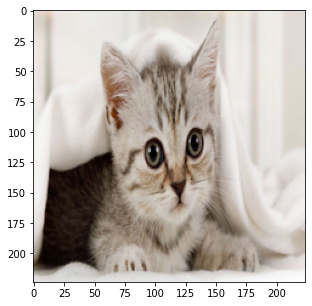

In [15]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[0])

plt.show()

### 【問題1】自作データセットでの分類の学習

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

#学習データをまとめる。
X_train = np.concatenate((dog_img_array, cat_img_array[:5, :, :, :]), axis=0)
X_test = cat_img_array[5, :, :, :]
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

#one-hot化
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

print(X_train.shape)
print(y_train.shape)
print(y_train)

(10, 224, 224, 3)
(10,)
[0 0 0 0 0 1 1 1 1 1]


In [24]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
#print(X_train.shape)
#print(X_val.shape)
#print(y_train.shape)
#print(y_val.shape)

In [25]:
K.clear_session( )

#モデルの設計

model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=X_train.shape[1:]))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(32, (3, 3),activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5972032   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [26]:
EPOCHS = 30

optimizer = keras.optimizers.Adam()
#loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#loss = keras.losses.CategoricalCrossentropy(from_logits=True)
loss = keras.losses.BinaryCrossentropy(from_logits=True)
metrics=['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

print(X_train.shape)
print(y_train.shape)
history = model.fit(X_train, y_train, epochs=EPOCHS, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),)
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),)

#y_pred = model.predict(X_test)

#scores = model.evaluate(X_test, y_test, verbose=1)
#print("test loss", scores[0])
#print("test acc", scores[1])

(10, 224, 224, 3)
(10,)
Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.6967 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 422ms/step - loss: 1.0914 - accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 222ms/step - loss: 2.0788 - accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 233ms/step - loss: 1.2184 - accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 236ms/step - loss: 0.5334 - accuracy: 0.8000
Epoch 6/30
1/1 [==============================] - 0s 241ms/step - loss: 0.6442 - accuracy: 0.6000
Epoch 7/30
1/1 [==============================] - 0s 227ms/step - loss: 0.5899 - accuracy: 0.6000
Epoch 8/30
1/1 [==============================] - 0s 250ms/step - loss: 0.3404 - accuracy: 0.9000
Epoch 9/30
1/1 [==============================] - 0s 238ms/step - loss: 0.7755 - accuracy: 0.5000
Epoch 10/30
1/1 [==============================] - 0s 234ms/step - loss: 0.2743 - accuracy: 1.000

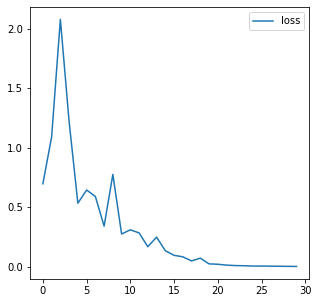

In [28]:
metrics = history.history
#plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
#plt.legend(['loss', 'val_loss'])
plt.plot(history.epoch, metrics['loss'])
plt.legend(['loss'])
plt.show()

### 【問題2】分類データセットに対するデータ拡張

In [29]:
cd ./image

/tmp/working/diveintocode-ml/Sprint18/image


In [52]:
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=224, height=224),
    A.HorizontalFlip(p=1),  #水平にひっくり返す
    #A.RandomBrightnessContrast(p=0.8),  #明るさのコントラスト  KeyError: dtype('float64')が出る。
    A.Rotate(limit=90, p=1),  #画像の回転 
    A.RandomBrightness(limit=0.7),  #明るさをランダムにする
    #A.JpegCompression(quality_lower=85, quality_upper=100, p=0.5),  KeyError: dtype('float64')が出る。
    #A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),  KeyError: dtype('float64')が出る。
    #A.RandomContrast(limit=0.2, p=0.5),  KeyError: dtype('float64')が出る。
    A.HorizontalFlip(),

])

image = dog_img_array[0]
print(image.shape)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

(224, 224, 3)


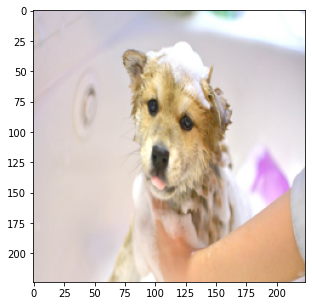

In [53]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(dog_img_array[0])
plt.show()

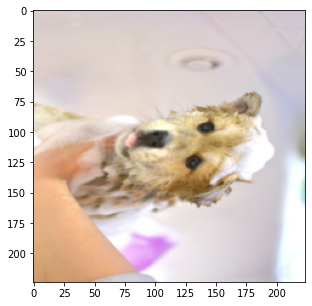

In [54]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(transformed_image)
plt.show()

albumentationsライブラリを使用することによりデータ拡張ができていることを確認した。

### 【問題3】物体検出データセットの用意

In [55]:
%matplotlib inline
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)
import glob
import os

import pprint

In [56]:
# 画像読み込み

def load_image(jpg):
    img = cv2.imread(jpg)
    return img

In [57]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=15):
    x_min, y_min, x_max, y_max = bbox
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    #plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [58]:
# 関数化しておく

def get_aug(aug):
    return Compose(aug, bbox_params={'format': 'pascal_voc', 'label_fields': ['category_id']})

In [63]:
# labelimgでxmlファイル（PascalVOC形式bbox）を作成済み

im_list = sorted(glob.glob('./image/*'))
im_list

['./image/cat_1.jpeg',
 './image/cat_1.xml',
 './image/cat_2.jpeg',
 './image/cat_2.xml',
 './image/cat_3.jpeg',
 './image/cat_3.xml',
 './image/cat_4.jpeg',
 './image/cat_4.xml',
 './image/cat_5.jpeg',
 './image/cat_5.xml',
 './image/cat_6.jpeg',
 './image/cat_6.xml',
 './image/dog_1.jpeg',
 './image/dog_1.xml',
 './image/dog_2.jpeg',
 './image/dog_2.xml',
 './image/dog_3.jpeg',
 './image/dog_3.xml',
 './image/dog_4.jpeg',
 './image/dog_4.xml',
 './image/dog_5.jpeg',
 './image/dog_5.xml',
 './image/vott']

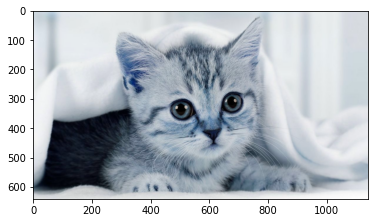

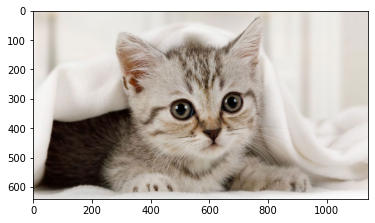

In [70]:
# データチェック

img = load_image('./image/cat_1.jpeg')
plt.imshow(img)
plt.show()

im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()

In [72]:
import os
import xml.etree.ElementTree as ET


# #読み込み例
# tree = ET.parse(path + 'cat.41box.xml')
# #一番上の階層
# root = tree.getroot()

COORDINATE = 4

path = './image/'
boxbox = []
point = COORDINATE

for filename in os.listdir(path):
    
    boundbox = []    
    if not filename.endswith('.xml'): 
        continue
       
    fullname = os.path.join(path, filename)
    tree = ET.parse(fullname)
    
    bndbox = tree.findall('object/bndbox')
    
    for i in range(point):
        # 座標取得
        boundbox.append(bndbox[0][i].text)
    boxbox.append(boundbox)
    
boxbox   

[['239.13811178768384',
  '16.96608253968965',
  '936.4705882352941',
  '608.7858965112529'],
 ['41.95739665678524',
  '10.494418540019762',
  '449.8547122035573',
  '638.1022006752305'],
 ['0.6737485139266304',
  '28.23278342185441',
  '655.493194390528',
  '512.4971877187294'],
 ['143.88400145728522', '52.921875', '624.0004706446723', '512'],
 ['0.1572578044375645',
  '19.572750548057083',
  '604.2068175954593',
  '384.5026247635832'],
 ['246.0408679816499',
  '45.182228891473066',
  '517.3495347974716',
  '428.27280787417766'],
 ['497.31359145220586',
  '90.47415865384615',
  '1154.6966911764707',
  '753.8700823102679'],
 ['87.8473020067402',
  '14.804801258785034',
  '274.4374939531734',
  '282.2024758613094'],
 ['0', '105.57323527785967', '421.3340912022704', '369.85674588185435'],
 ['217.48263552954077',
  '0.043855244922488226',
  '502.53726104956786',
  '417.3386755543563'],
 ['182.9799164731682',
  '53.474344369456254',
  '416.1072142672858',
  '452.4601986711197']]

In [76]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298

# 座標は手入力
annotations = {'image': img, 'bboxes': [[239, 16, 936, 608]], 'category_id': [3]}
category_id_to_name = {3: 'cat'}

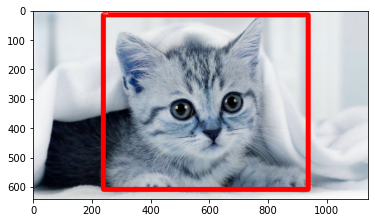

In [77]:
visualize(annotations, category_id_to_name)

### 【問題4】物体検出データセットに対するデータ拡張

Compose([
  VerticalFlip(always_apply=False, p=1),
], p=1.0, bbox_params={'format': 'pascal_voc', 'label_fields': ['category_id'], 'min_area': 0.0, 'min_visibility': 0.0, 'check_each_transform': True}, keypoint_params=None, additional_targets={})
{'image': array([[[226, 228, 228],
        [226, 228, 228],
        [226, 228, 228],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[226, 228, 229],
        [226, 228, 229],
        [226, 228, 229],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[226, 228, 229],
        [226, 228, 229],
        [225, 227, 228],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[211, 221, 228],
        [211, 221, 228],
        [211, 221, 228],
        ...,
        [217, 221, 226],
        [217, 221, 226],
        [217, 221, 226]],

       [[211, 221, 228],
        [211, 221, 228],
        [211, 221, 2

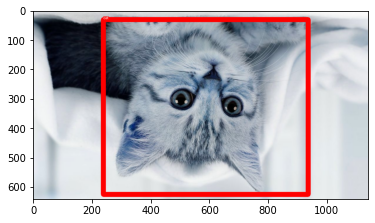

In [78]:
transform = Compose([VerticalFlip(p=1)],bbox_params={'format': 'pascal_voc', 'label_fields': ['category_id']})
transformed = transform(**annotations)
visualize(transformed, category_id_to_name)

# Composeの中身を表示
print(transform)
# 変換後のimage arrayとbboxとcategory_id
print(transformed)

{'image': array([[[218, 222, 227],
        [218, 222, 227],
        [218, 222, 227],
        ...,
        [212, 222, 229],
        [212, 222, 229],
        [212, 222, 229]],

       [[218, 222, 227],
        [218, 222, 227],
        [218, 222, 227],
        ...,
        [211, 221, 228],
        [211, 221, 228],
        [211, 221, 228]],

       [[217, 221, 226],
        [217, 221, 226],
        [217, 221, 226],
        ...,
        [211, 221, 228],
        [211, 221, 228],
        [211, 221, 228]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [225, 227, 228],
        [226, 228, 229],
        [226, 228, 229]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [226, 228, 229],
        [226, 228, 229],
        [226, 228, 229]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [226, 228, 228],
        [226, 228, 228],
        [226, 

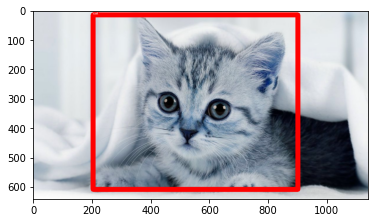

In [79]:
# get_augで実行

transform = get_aug([HorizontalFlip(p=1)])
transformed = transform(**annotations)
visualize(transformed, category_id_to_name)

# 変換後のimage arrayとbboxとcategory_id
print(transformed)

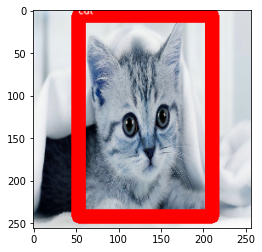

In [80]:
transform = get_aug([Resize(p=1, height=256, width=256)])
transformed = transform(**annotations)
visualize(transformed, category_id_to_name)

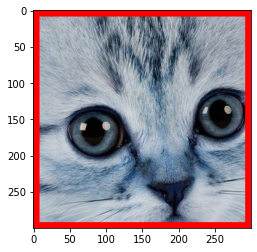

In [81]:
transform = get_aug([CenterCrop(p=1, height=300, width=300)])
transformed = transform(**annotations)
visualize(transformed, category_id_to_name)